In [29]:
import pandas as pd
from statsmodels.api import MNLogit

In [17]:
# 최종 merge 데이터
mergedata = pd.read_csv('./data/total_df.csv', encoding='cp949')
mergedata

,기준_날짜시간,year,month,date,time,요일,대여소_ID,대여소명,전체_건수,전체_이용_분,...,버스정류장ARS번호,정류장명,버스 수,버스_하차승객수,역명,지하철하차승객수,강수,기온,풍속,dem
0,2022-01-01 00:00:00,2022,1,1,0,토,ST-10,서교동,1,7,...,14941.0,우리은행서교동지점,1.0,0.057891,합정,5.684928,0.0,-5.3,1.6,16.12
1,2022-01-01 00:00:00,2022,1,1,0,토,ST-1004,신정3동,1,17,...,15416.0,신정이펜하우스2단지,2.0,1.159528,신정네거리,4.691823,0.0,-4.4,1.5,37.83
2,2022-01-01 00:00:00,2022,1,1,0,토,ST-1014,신정3동,1,9,...,15362.0,신정현대아파트.서부트럭터미널,13.0,4.810520,신정네거리,4.691823,0.0,-4.4,1.5,20.52
3,2022-01-01 00:00:00,2022,1,1,0,토,ST-1015,목5동,1,11,...,15117.0,신목동역2번출구,2.0,0.083883,당산,5.228105,0.0,-4.4,1.5,10.17
4,2022-01-01 00:00:00,2022,1,1,0,토,ST-1016,신월4동,1,9,...,15222.0,한빛종합사회복지관,8.0,0.095994,신정네거리,4.691823,0.0,-4.6,1.2,12.79
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9224128,2022-09-30 23:00:00,2022,9,30,23,금,ST-990,상암동,3,24,...,14316.0,월드컵경기장북측,3.0,1.377682,디지털미디어시티,784.167124,0.0,18.5,0.9,14.21
9224129,2022-09-30 23:00:00,2022,9,30,23,금,ST-992,아현동,1,3,...,14746.0,엘지빌딩,1.0,2.562754,애오개,186.171971,0.0,19.4,1.8,16.97
9224130,2022-09-30 23:00:00,2022,9,30,23,금,ST-994,목1동,3,19,...,15159.0,목1동주민센터,3.0,9.332616,오목교,NaN,0.0,20.4,1.2,8.98
9224131,2022-09-30 23:00:00,2022,9,30,23,금,ST-996,신월2동,5,35,...,15288.0,양강중학교,8.0,4.684909,신정네거리,456.143257,0.0,20.4,1.2,33.24


In [23]:
mergedata_analyse=mergedata.iloc[:,[2,4,5,8,16,17,19,20,21,22,23]]
mergedata_analyse

,month,time,요일,전체_건수,버스 수,버스_하차승객수,지하철하차승객수,강수,기온,풍속,dem
0,1,0,토,1,1.0,0.057891,5.684928,0.0,-5.3,1.6,16.12
1,1,0,토,1,2.0,1.159528,4.691823,0.0,-4.4,1.5,37.83
2,1,0,토,1,13.0,4.810520,4.691823,0.0,-4.4,1.5,20.52
3,1,0,토,1,2.0,0.083883,5.228105,0.0,-4.4,1.5,10.17
4,1,0,토,1,8.0,0.095994,4.691823,0.0,-4.6,1.2,12.79
...,...,...,...,...,...,...,...,...,...,...,...
9224128,9,23,금,3,3.0,1.377682,784.167124,0.0,18.5,0.9,14.21
9224129,9,23,금,1,1.0,2.562754,186.171971,0.0,19.4,1.8,16.97
9224130,9,23,금,3,3.0,9.332616,NaN,0.0,20.4,1.2,8.98
9224131,9,23,금,5,8.0,4.684909,456.143257,0.0,20.4,1.2,33.24


In [24]:
mergedata_analyse=pd.get_dummies(mergedata_analyse, columns=['요일'])
mergedata_analyse

,month,time,전체_건수,버스 수,버스_하차승객수,지하철하차승객수,강수,기온,풍속,dem,요일_금,요일_목,요일_수,요일_월,요일_일,요일_토,요일_화
0,1,0,1,1.0,0.057891,5.684928,0.0,-5.3,1.6,16.12,0,0,0,0,0,1,0
1,1,0,1,2.0,1.159528,4.691823,0.0,-4.4,1.5,37.83,0,0,0,0,0,1,0
2,1,0,1,13.0,4.810520,4.691823,0.0,-4.4,1.5,20.52,0,0,0,0,0,1,0
3,1,0,1,2.0,0.083883,5.228105,0.0,-4.4,1.5,10.17,0,0,0,0,0,1,0
4,1,0,1,8.0,0.095994,4.691823,0.0,-4.6,1.2,12.79,0,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9224128,9,23,3,3.0,1.377682,784.167124,0.0,18.5,0.9,14.21,1,0,0,0,0,0,0
9224129,9,23,1,1.0,2.562754,186.171971,0.0,19.4,1.8,16.97,1,0,0,0,0,0,0
9224130,9,23,3,3.0,9.332616,NaN,0.0,20.4,1.2,8.98,1,0,0,0,0,0,0
9224131,9,23,5,8.0,4.684909,456.143257,0.0,20.4,1.2,33.24,1,0,0,0,0,0,0


In [25]:
mergedata_analyse=mergedata_analyse.dropna(axis=0)
mergedata_analyse

,month,time,전체_건수,버스 수,버스_하차승객수,지하철하차승객수,강수,기온,풍속,dem,요일_금,요일_목,요일_수,요일_월,요일_일,요일_토,요일_화
0,1,0,1,1.0,0.057891,5.684928,0.0,-5.3,1.6,16.12,0,0,0,0,0,1,0
1,1,0,1,2.0,1.159528,4.691823,0.0,-4.4,1.5,37.83,0,0,0,0,0,1,0
2,1,0,1,13.0,4.810520,4.691823,0.0,-4.4,1.5,20.52,0,0,0,0,0,1,0
3,1,0,1,2.0,0.083883,5.228105,0.0,-4.4,1.5,10.17,0,0,0,0,0,1,0
4,1,0,1,8.0,0.095994,4.691823,0.0,-4.6,1.2,12.79,0,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9224126,9,23,2,2.0,0.455578,247.576671,0.0,19.9,1.1,14.80,1,0,0,0,0,0,0
9224128,9,23,3,3.0,1.377682,784.167124,0.0,18.5,0.9,14.21,1,0,0,0,0,0,0
9224129,9,23,1,1.0,2.562754,186.171971,0.0,19.4,1.8,16.97,1,0,0,0,0,0,0
9224131,9,23,5,8.0,4.684909,456.143257,0.0,20.4,1.2,33.24,1,0,0,0,0,0,0


In [26]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
mergedata_analyse_scale=mergedata_analyse.copy()
mergedata_analyse_scale.iloc[:,[0,1,3,4,5,6,7,8,9]] = scaler.fit_transform(mergedata_analyse_scale.iloc[:,[0,1,3,4,5,6,7,8,9]])
mergedata_analyse_scale

,month,time,전체_건수,버스 수,버스_하차승객수,지하철하차승객수,강수,기온,풍속,dem,요일_금,요일_목,요일_수,요일_월,요일_일,요일_토,요일_화
0,0.0,0.0,1,0.034483,0.000053,0.000241,0.011628,0.510274,0.268041,0.105929,0,0,0,0,0,1,0
1,0.0,0.0,1,0.068966,0.001070,0.000199,0.011628,0.520548,0.257732,0.312554,0,0,0,0,0,1,0
2,0.0,0.0,1,0.448276,0.004438,0.000199,0.011628,0.520548,0.257732,0.147806,0,0,0,0,0,1,0
3,0.0,0.0,1,0.068966,0.000077,0.000222,0.011628,0.520548,0.257732,0.049300,0,0,0,0,0,1,0
4,0.0,0.0,1,0.275862,0.000089,0.000199,0.011628,0.518265,0.226804,0.074236,0,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9224126,1.0,1.0,2,0.068966,0.000420,0.010514,0.011628,0.797945,0.216495,0.093366,1,0,0,0,0,0,0
9224128,1.0,1.0,3,0.103448,0.001271,0.033300,0.011628,0.781963,0.195876,0.087751,1,0,0,0,0,0,0
9224129,1.0,1.0,1,0.034483,0.002364,0.007906,0.011628,0.792237,0.288660,0.114019,1,0,0,0,0,0,0
9224131,1.0,1.0,5,0.275862,0.004322,0.019370,0.011628,0.803653,0.226804,0.268868,1,0,0,0,0,0,0


In [27]:
mergedata_analyse.columns=['month','time','count','bus','bus_people','subway_people','rain','temp','wind','dem','fri','thur','wed','mon','sun','sat','thue']
mergedata_analyse # 원상복구 필요 

,month,time,count,bus,bus_people,subway_people,rain,temp,wind,dem,fri,thur,wed,mon,sun,sat,thue
0,1,0,1,1.0,0.057891,5.684928,0.0,-5.3,1.6,16.12,0,0,0,0,0,1,0
1,1,0,1,2.0,1.159528,4.691823,0.0,-4.4,1.5,37.83,0,0,0,0,0,1,0
2,1,0,1,13.0,4.810520,4.691823,0.0,-4.4,1.5,20.52,0,0,0,0,0,1,0
3,1,0,1,2.0,0.083883,5.228105,0.0,-4.4,1.5,10.17,0,0,0,0,0,1,0
4,1,0,1,8.0,0.095994,4.691823,0.0,-4.6,1.2,12.79,0,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9224126,9,23,2,2.0,0.455578,247.576671,0.0,19.9,1.1,14.80,1,0,0,0,0,0,0
9224128,9,23,3,3.0,1.377682,784.167124,0.0,18.5,0.9,14.21,1,0,0,0,0,0,0
9224129,9,23,1,1.0,2.562754,186.171971,0.0,19.4,1.8,16.97,1,0,0,0,0,0,0
9224131,9,23,5,8.0,4.684909,456.143257,0.0,20.4,1.2,33.24,1,0,0,0,0,0,0


In [31]:
rg_model = MNLogit.from_formula(formula='count ~ month + time + bus + bus_people + subway_people + rain + temp + wind + dem + fri + thur + wed + mon + sun + sat + thue', data=mergedata_analyse)
rg_result = rg_model.fit()
print(rg_result.summary())

KeyboardInterrupt: 

-------------

In [1]:
import pandas as pd
# 최종 merge 데이터
mergedata = pd.read_csv('./data/total_df.csv', encoding='cp949')
mergedata

,기준_날짜시간,year,month,date,time,요일,대여소_ID,대여소명,전체_건수,전체_이용_분,...,버스정류장ARS번호,정류장명,버스 수,버스_하차승객수,역명,지하철하차승객수,강수,기온,풍속,dem
0,2022-01-01 00:00:00,2022,1,1,0,토,ST-10,서교동,1,7,...,14941.0,우리은행서교동지점,1.0,0.057891,합정,5.684928,0.0,-5.3,1.6,16.12
1,2022-01-01 00:00:00,2022,1,1,0,토,ST-1004,신정3동,1,17,...,15416.0,신정이펜하우스2단지,2.0,1.159528,신정네거리,4.691823,0.0,-4.4,1.5,37.83
2,2022-01-01 00:00:00,2022,1,1,0,토,ST-1014,신정3동,1,9,...,15362.0,신정현대아파트.서부트럭터미널,13.0,4.810520,신정네거리,4.691823,0.0,-4.4,1.5,20.52
3,2022-01-01 00:00:00,2022,1,1,0,토,ST-1015,목5동,1,11,...,15117.0,신목동역2번출구,2.0,0.083883,당산,5.228105,0.0,-4.4,1.5,10.17
4,2022-01-01 00:00:00,2022,1,1,0,토,ST-1016,신월4동,1,9,...,15222.0,한빛종합사회복지관,8.0,0.095994,신정네거리,4.691823,0.0,-4.6,1.2,12.79
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9224128,2022-09-30 23:00:00,2022,9,30,23,금,ST-990,상암동,3,24,...,14316.0,월드컵경기장북측,3.0,1.377682,디지털미디어시티,784.167124,0.0,18.5,0.9,14.21
9224129,2022-09-30 23:00:00,2022,9,30,23,금,ST-992,아현동,1,3,...,14746.0,엘지빌딩,1.0,2.562754,애오개,186.171971,0.0,19.4,1.8,16.97
9224130,2022-09-30 23:00:00,2022,9,30,23,금,ST-994,목1동,3,19,...,15159.0,목1동주민센터,3.0,9.332616,오목교,NaN,0.0,20.4,1.2,8.98
9224131,2022-09-30 23:00:00,2022,9,30,23,금,ST-996,신월2동,5,35,...,15288.0,양강중학교,8.0,4.684909,신정네거리,456.143257,0.0,20.4,1.2,33.24


In [18]:
mergedata_dropna=mergedata.dropna(axis=0)
mergedata_dropna

,기준_날짜시간,year,month,date,time,요일,대여소_ID,대여소명,전체_건수,전체_이용_분,...,버스정류장ARS번호,정류장명,버스 수,버스_하차승객수,역명,지하철하차승객수,강수,기온,풍속,dem
0,2022-01-01 00:00:00,2022,1,1,0,토,ST-10,서교동,1,7,...,14941.0,우리은행서교동지점,1.0,0.057891,합정,5.684928,0.0,-5.3,1.6,16.12
1,2022-01-01 00:00:00,2022,1,1,0,토,ST-1004,신정3동,1,17,...,15416.0,신정이펜하우스2단지,2.0,1.159528,신정네거리,4.691823,0.0,-4.4,1.5,37.83
2,2022-01-01 00:00:00,2022,1,1,0,토,ST-1014,신정3동,1,9,...,15362.0,신정현대아파트.서부트럭터미널,13.0,4.810520,신정네거리,4.691823,0.0,-4.4,1.5,20.52
3,2022-01-01 00:00:00,2022,1,1,0,토,ST-1015,목5동,1,11,...,15117.0,신목동역2번출구,2.0,0.083883,당산,5.228105,0.0,-4.4,1.5,10.17
4,2022-01-01 00:00:00,2022,1,1,0,토,ST-1016,신월4동,1,9,...,15222.0,한빛종합사회복지관,8.0,0.095994,신정네거리,4.691823,0.0,-4.6,1.2,12.79
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9224126,2022-09-30 23:00:00,2022,9,30,23,금,ST-988,자양3동,2,16,...,5202.0,신양초등학교앞,2.0,0.455578,뚝섬유원지,247.576671,0.0,19.9,1.1,14.80
9224128,2022-09-30 23:00:00,2022,9,30,23,금,ST-990,상암동,3,24,...,14316.0,월드컵경기장북측,3.0,1.377682,디지털미디어시티,784.167124,0.0,18.5,0.9,14.21
9224129,2022-09-30 23:00:00,2022,9,30,23,금,ST-992,아현동,1,3,...,14746.0,엘지빌딩,1.0,2.562754,애오개,186.171971,0.0,19.4,1.8,16.97
9224131,2022-09-30 23:00:00,2022,9,30,23,금,ST-996,신월2동,5,35,...,15288.0,양강중학교,8.0,4.684909,신정네거리,456.143257,0.0,20.4,1.2,33.24


In [30]:
mergedata_dropna_sample=mergedata_dropna.sample(n=1000)

In [31]:
mergedata_dropna_sample=mergedata_dropna_sample.iloc[:,[2,4,5,8,16,17,19,20,21,22,23]]
mergedata_dropna_sample

,month,time,요일,전체_건수,버스 수,버스_하차승객수,지하철하차승객수,강수,기온,풍속,dem
6029878,7,8,수,10,3.0,135.708329,62.903339,0.0,31.900000,1.9,15.40
1759733,3,7,월,1,6.0,34.757322,1442.111440,0.0,7.100000,2.4,35.15
4878994,6,13,일,6,2.0,8.948992,433.266995,0.0,20.799999,1.7,9.92
3882291,5,9,목,2,6.0,50.886360,3771.122249,0.0,22.400000,3.4,27.73
3565262,5,8,수,1,3.0,171.151983,852.543146,0.0,21.799999,3.7,20.17
...,...,...,...,...,...,...,...,...,...,...,...
5635166,6,20,금,1,4.0,19.156514,592.261671,0.0,22.200001,1.1,35.58
5499345,6,2,화,1,3.0,0.000000,0.000000,0.0,28.700001,3.5,17.18
6237187,7,16,월,6,1.0,5.535726,2705.489719,0.0,23.200001,0.2,27.53
7089257,8,11,목,3,6.0,34.398492,220.305007,0.0,25.299999,0.1,20.78


In [33]:
mergedata_dropna_sample['요일']=mergedata_dropna_sample['요일'].apply(lambda x: '주말' if (x == '토' or x == '일') else '평일')
mergedata_dropna_sample

,month,time,요일,전체_건수,버스 수,버스_하차승객수,지하철하차승객수,강수,기온,풍속,dem
6029878,7,8,평일,10,3.0,135.708329,62.903339,0.0,31.900000,1.9,15.40
1759733,3,7,평일,1,6.0,34.757322,1442.111440,0.0,7.100000,2.4,35.15
4878994,6,13,주말,6,2.0,8.948992,433.266995,0.0,20.799999,1.7,9.92
3882291,5,9,평일,2,6.0,50.886360,3771.122249,0.0,22.400000,3.4,27.73
3565262,5,8,평일,1,3.0,171.151983,852.543146,0.0,21.799999,3.7,20.17
...,...,...,...,...,...,...,...,...,...,...,...
5635166,6,20,평일,1,4.0,19.156514,592.261671,0.0,22.200001,1.1,35.58
5499345,6,2,평일,1,3.0,0.000000,0.000000,0.0,28.700001,3.5,17.18
6237187,7,16,평일,6,1.0,5.535726,2705.489719,0.0,23.200001,0.2,27.53
7089257,8,11,평일,3,6.0,34.398492,220.305007,0.0,25.299999,0.1,20.78


In [34]:
mergedata_dropna_sample=pd.get_dummies(mergedata_dropna_sample, columns=['요일'])
mergedata_dropna_sample

,month,time,전체_건수,버스 수,버스_하차승객수,지하철하차승객수,강수,기온,풍속,dem,요일_주말,요일_평일
6029878,7,8,10,3.0,135.708329,62.903339,0.0,31.900000,1.9,15.40,0,1
1759733,3,7,1,6.0,34.757322,1442.111440,0.0,7.100000,2.4,35.15,0,1
4878994,6,13,6,2.0,8.948992,433.266995,0.0,20.799999,1.7,9.92,1,0
3882291,5,9,2,6.0,50.886360,3771.122249,0.0,22.400000,3.4,27.73,0,1
3565262,5,8,1,3.0,171.151983,852.543146,0.0,21.799999,3.7,20.17,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...
5635166,6,20,1,4.0,19.156514,592.261671,0.0,22.200001,1.1,35.58,0,1
5499345,6,2,1,3.0,0.000000,0.000000,0.0,28.700001,3.5,17.18,0,1
6237187,7,16,6,1.0,5.535726,2705.489719,0.0,23.200001,0.2,27.53,0,1
7089257,8,11,3,6.0,34.398492,220.305007,0.0,25.299999,0.1,20.78,0,1


In [35]:
mergedata_dropna_sample.columns=['month','time','count','bus','bus_people','subway_people','rain','temp','wind','dem','weekday','weekend']
mergedata_dropna_sample

,month,time,count,bus,bus_people,subway_people,rain,temp,wind,dem,weekday,weekend
6029878,7,8,10,3.0,135.708329,62.903339,0.0,31.900000,1.9,15.40,0,1
1759733,3,7,1,6.0,34.757322,1442.111440,0.0,7.100000,2.4,35.15,0,1
4878994,6,13,6,2.0,8.948992,433.266995,0.0,20.799999,1.7,9.92,1,0
3882291,5,9,2,6.0,50.886360,3771.122249,0.0,22.400000,3.4,27.73,0,1
3565262,5,8,1,3.0,171.151983,852.543146,0.0,21.799999,3.7,20.17,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...
5635166,6,20,1,4.0,19.156514,592.261671,0.0,22.200001,1.1,35.58,0,1
5499345,6,2,1,3.0,0.000000,0.000000,0.0,28.700001,3.5,17.18,0,1
6237187,7,16,6,1.0,5.535726,2705.489719,0.0,23.200001,0.2,27.53,0,1
7089257,8,11,3,6.0,34.398492,220.305007,0.0,25.299999,0.1,20.78,0,1


In [36]:
mergedata_dropna_sample.reset_index(drop=True, inplace=True)
mergedata_dropna_sample

,month,time,count,bus,bus_people,subway_people,rain,temp,wind,dem,weekday,weekend
0,7,8,10,3.0,135.708329,62.903339,0.0,31.900000,1.9,15.40,0,1
1,3,7,1,6.0,34.757322,1442.111440,0.0,7.100000,2.4,35.15,0,1
2,6,13,6,2.0,8.948992,433.266995,0.0,20.799999,1.7,9.92,1,0
3,5,9,2,6.0,50.886360,3771.122249,0.0,22.400000,3.4,27.73,0,1
4,5,8,1,3.0,171.151983,852.543146,0.0,21.799999,3.7,20.17,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...
995,6,20,1,4.0,19.156514,592.261671,0.0,22.200001,1.1,35.58,0,1
996,6,2,1,3.0,0.000000,0.000000,0.0,28.700001,3.5,17.18,0,1
997,7,16,6,1.0,5.535726,2705.489719,0.0,23.200001,0.2,27.53,0,1
998,8,11,3,6.0,34.398492,220.305007,0.0,25.299999,0.1,20.78,0,1


In [37]:
import statsmodels.formula.api as sm
from statsmodels.stats.anova import anova_lm

model = sm.ols(formula = 'count ~ month + time + bus + bus_people + subway_people + rain + temp + wind + dem + weekday + weekend',data=mergedata_dropna_sample).fit()
print(anova_lm(model))

                  df        sum_sq     mean_sq          F        PR(>F)
month            1.0    228.407593  228.407593  16.897451  4.272621e-05
time             1.0    721.359548  721.359548  53.365730  5.694451e-13
bus              1.0      5.611292    5.611292   0.415120  5.195316e-01
bus_people       1.0    281.453616  281.453616  20.821763  5.673786e-06
subway_people    1.0     21.542734   21.542734   1.593718  2.070933e-01
rain             1.0      3.152128    3.152128   0.233192  6.292736e-01
temp             1.0      9.462616    9.462616   0.700038  4.029729e-01
wind             1.0     13.709103   13.709103   1.014191  3.141472e-01
dem              1.0    571.402081  571.402081  42.271970  1.258041e-10
weekday          1.0     31.212768   31.212768   2.309101  1.289380e-01
weekend          1.0     20.379919   20.379919   1.507694  2.197835e-01
Residual       989.0  13368.590521   13.517281        NaN           NaN


## EDA

In [27]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

### 결측치 확인 

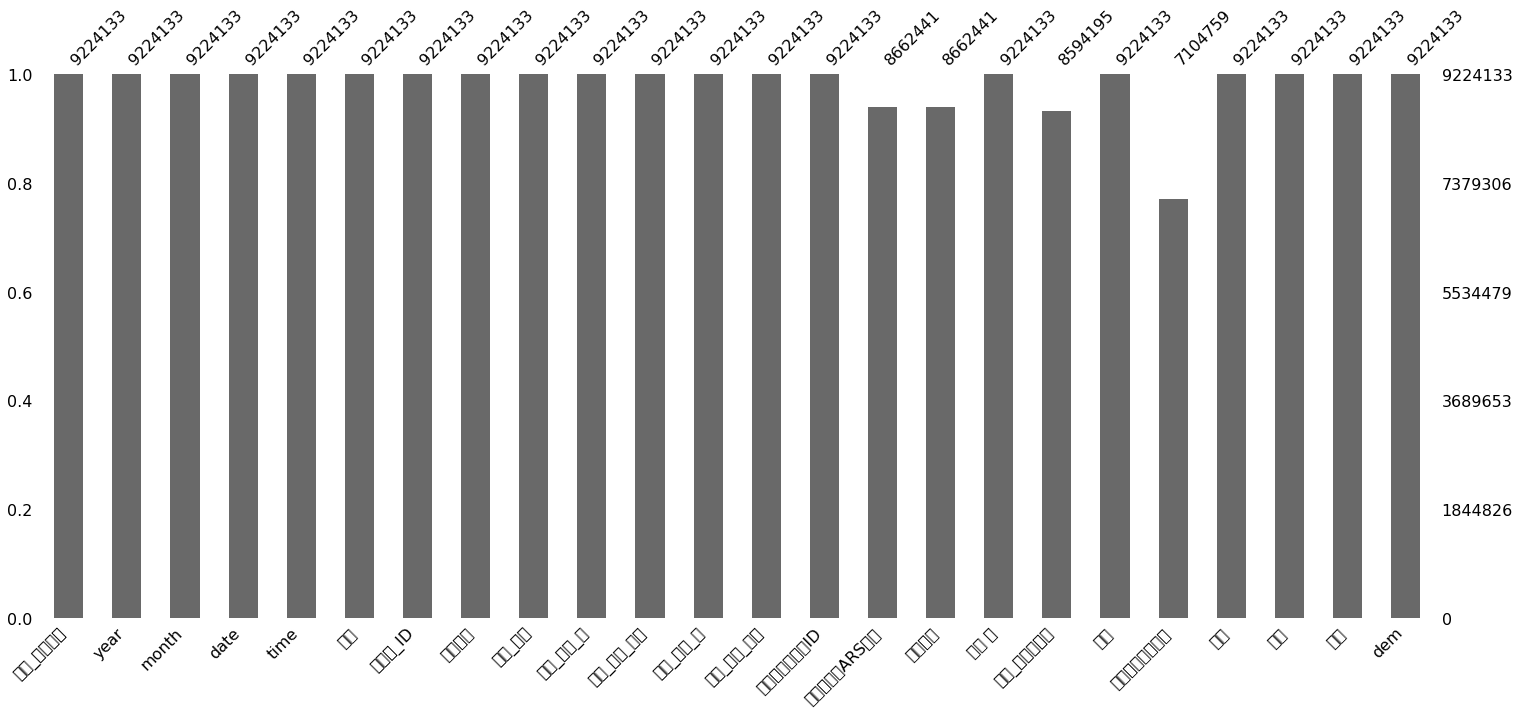

In [28]:
import missingno as msno
import matplotlib.pyplot as plt

msno.bar(df=mergedata)
plt.show()

In [ ]:
sns.distplot(mergedata['전체_건수'], kde=True)